In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
ft = 10000
local_path = f'/storage/shared/oceanparcels/output_data/data_Claudio/hc13_3/hc13_0.zarr'

In [8]:
sim = xr.open_zarr(local_path)

In [11]:
sim = sim.compute()

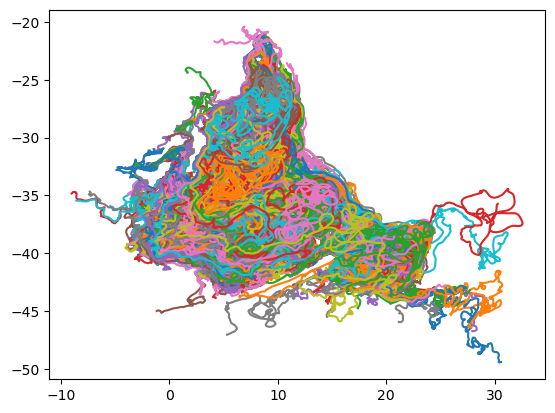

In [12]:
for i in range(1000):
    plt.plot(sim['lon'][i,:], sim['lat'][i,:])

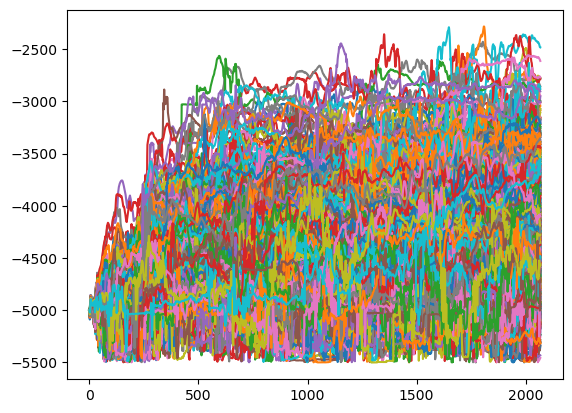

In [14]:
for i in range(1000):
    plt.plot(- sim['z'][i,:])

In [7]:
sim

<xarray.Dataset>
Dimensions:           (trajectory: 8192, obs: 2500)
Coordinates:
  * obs               (obs) int32 0 1 2 3 4 5 ... 2494 2495 2496 2497 2498 2499
  * trajectory        (trajectory) int64 0 1 2 3 4 ... 8187 8188 8189 8190 8191
Data variables: (12/20)
    abs_salinity      (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    bottom            (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    cons_temperature  (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    density           (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    distance          (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    floored           (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    ...                ...
    u                 (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    v                 (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    v_s               (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    w                 (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    z                 (trajectory, obs) float64 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    z_kz              (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.4.2-148-gb7738e92

In [5]:
sim = xr.open_zarr(local_path)
sim = sim.where(sim.radius < 1e-6/2, drop=False)

depths = sim['z'].values

k1, k2 = np.where(depths < 10)
idx_particles, idx_k2 = np.unique(k1, return_index=True)
surface_time = k2[idx_k2]


In [32]:
for i in range(100)

<xarray.Dataset>
Dimensions:           (trajectory: 8192, obs: 4500)
Coordinates:
  * obs               (obs) int32 0 1 2 3 4 5 ... 4494 4495 4496 4497 4498 4499
  * trajectory        (trajectory) int64 0 1 2 3 4 ... 8187 8188 8189 8190 8191
Data variables: (12/19)
    abs_salinity      (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    bottom            (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    cons_temperature  (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    density           (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    distance          (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    floored           (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    ...                ...
    u                 (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    v                 (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    v_s               (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    w                 (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    z                 (trajectory, obs) float64 dask.array<chunksize=(8192, 500), meta=np.ndarray>
    z_kz              (trajectory, obs) float32 dask.array<chunksize=(8192, 500), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        v2.4.1-46-g28f231fa

In [35]:
23/8192*100

0.28076171875

Text(0, 0.5, 'Particle Depth [m]')

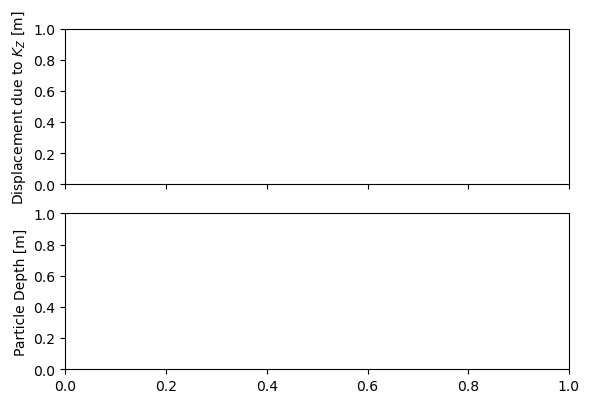

In [6]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(6, 4), sharex=True, tight_layout=True)

for i in idx_particles:
    ax[0].plot(sim['time'][i, :], sim['z_kz'][i, :], label=i)
    ax[1].plot(sim['time'][i, :], sim['z'][i, :], label=i)
    
ax[0].set_ylabel(r'Displacement due to $K_Z$ [m]')
ax[1].set_ylabel(r'Particle Depth [m]')